## NotebookExploration4DataScience_v1

Contact: Frank Greco  fjgreco@uchicago.edu for help

### Guidance for working with this notebook:

#### This notebook is being provided as a place to experiment and learn more about Python and data science.

#### Best practice: make a copy of this notebook using the File/Make a Copy menu option. Keep the original as a master and work off the copy, which you may rename and modify as desired.  

#### Links to <font color=green>references</font> for the various Python packages and methods used in the notebook are included throughout.  The links  found at the end of this notebook are to some multi-topic public data repositories that contain data you may find interesting to download and explore.

####   A  '!' at the beginning of a line  e.g., !pip and !rm found below, directs the line to your local (laptop) command environment (not to Python).

#### Un-comment and run any of the following pip install commands as needed.  Be sure to re-comment afterwards, as the installations needonly be run once.  (Note the use of '!')


In [1]:
#!pip install pandas

In [2]:
#!pip install numpy

In [3]:
#!pip install matplotlib

In [39]:
#!pip install seaborn 

In [4]:
#!pip install sklearn

In [5]:
#!pip install wget

### pandas

<font color=green>Reference</font> https://pandas.pydata.org/

In [1]:
import pandas as pd

### numpy

https://numpy.org/

In [2]:
import numpy as np

### matplotlib

<font color=green>Reference</font> https://matplotlib.org/

In [3]:
# import for visualization
import matplotlib.pyplot as plt
%matplotlib inline

### seaborn
<font color=green>Reference</font> https://seaborn.pydata.org/

In [4]:
import seaborn as sns

### sklearn

<font color=green>Reference</font> https://scikit-learn.org/stable/

In [5]:
# imports for math and stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

### wget

<font color=green>Reference</font> https://www.gnu.org/software/wget/

In [6]:
import wget

## Get worldwide Covid19 data

Source: https://github.com/owid/covid-19-data/tree/master/public/data

In [7]:
covid19_url="https://covid.ourworldindata.org/data/owid-covid-data.csv"

In [8]:
body_covid19="owid-covid-data.csv"

#### Remove older  coved19  data file from the local directory:

In [9]:
!rm $body_covid19

rm: owid-covid-data.csv: No such file or directory


#### Get the current  covid19 data file:

In [10]:
wget.download(covid19_url,body_covid19)

'owid-covid-data.csv'

#### Read the csv file into a pandas data frame:

In [11]:
df_covid19_ = pd.read_csv(body_covid19)

#### View the first 5 rows.  To see more (or less)  rows use df_covid19.head( 'number of rows'):

In [12]:
df_covid19_.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN                597.029   
1        1803.987              NaN                597.029   
2        1803.987              NaN                597.029   
3        1803.987              NaN                597.029   
4        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         0.5            64.83                    0.511  
1                         0.5            64.83                    0.511  
2                         0.5            64.83                    0.511  
3                         0.5            64.83                    0.511  
4                         0.5            64.83                    0.511  

[5 rows x 59 columns]

#### When displaying a data frame, pandas by default limits the number of rows shown.  To set the number  rows df_covid19_ run the set the max_rows value and run the follow cell.

Note: df_covid19_.shape[0]+1 yields the number of rows in the df_covid19_  dataframe. Use a similar approach for any other dataframe.

<font color=red>Warning: Having set the display limit to a large number, as will happen when using the total number of rows in a large dataframe as a max_rows value, can result in overloading your laptop when viewing large dataframes:</font> 


#### The following cell is an example of how to select rows based on a pattern or search criteria. 

#### Obtain the most recent entry for a each country:

In [13]:
df_covid19=df_covid19_.groupby(['location']).max()

In [14]:
df_covid19.reset_index(inplace=True)

####  <font color= green>Matplotlib tutorials:</font>

https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm

https://pythonbasics.org/matplotlib-bar-chart

#### <font color=red>Quick, dirty and hard to read</font>

<AxesSubplot:xlabel='location'>

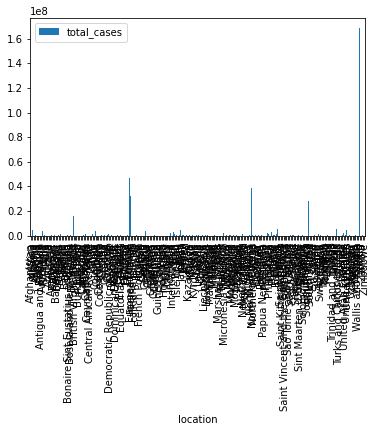

In [15]:
df_covid19.plot.bar(x='location', y='total_cases')

#### <font color=orange>Using matplotlib affords control the framesize and over how the ticks are displayed. Still, the presentation is not ideal: </font>

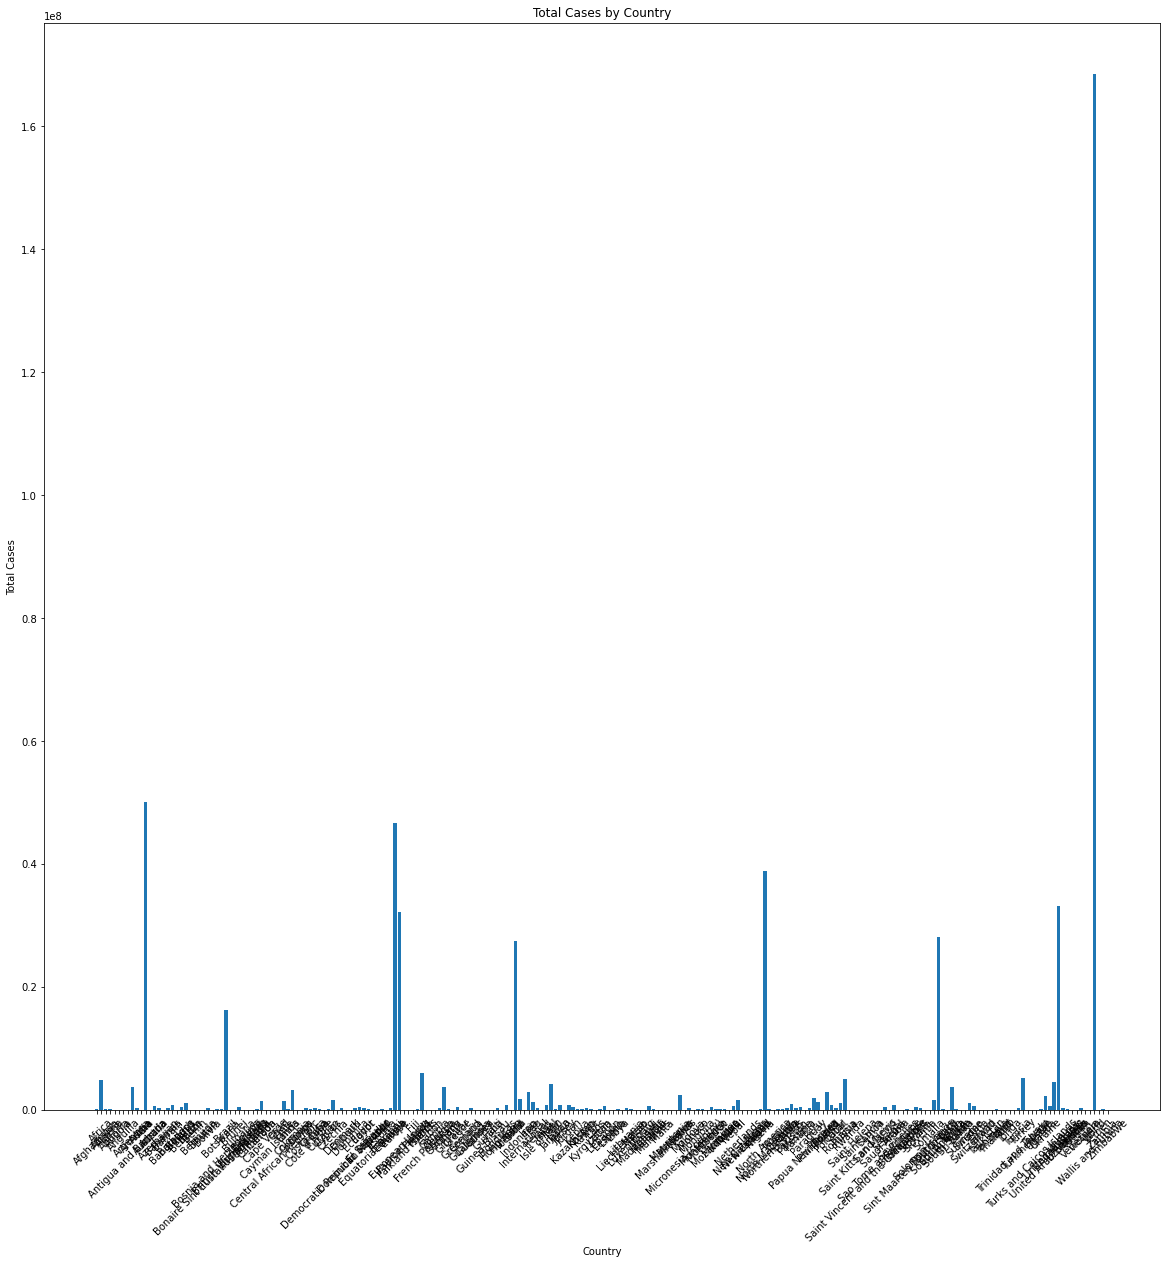

In [16]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data = df_covid19['total_cases']
labels = df_covid19['location']
plt.figure(figsize=(20,20))
plt.xticks(range(len(data)), labels, rotation=45)
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Total Cases by Country')
plt.bar(range(len(data)), data) 
plt.show()

#### <font color=teal>Changing the orientation from a vertical to a horizontal bar chart helps. But, the ordering of the countries appears random and the country names don't match 1 for 1 with the total cases.</font>

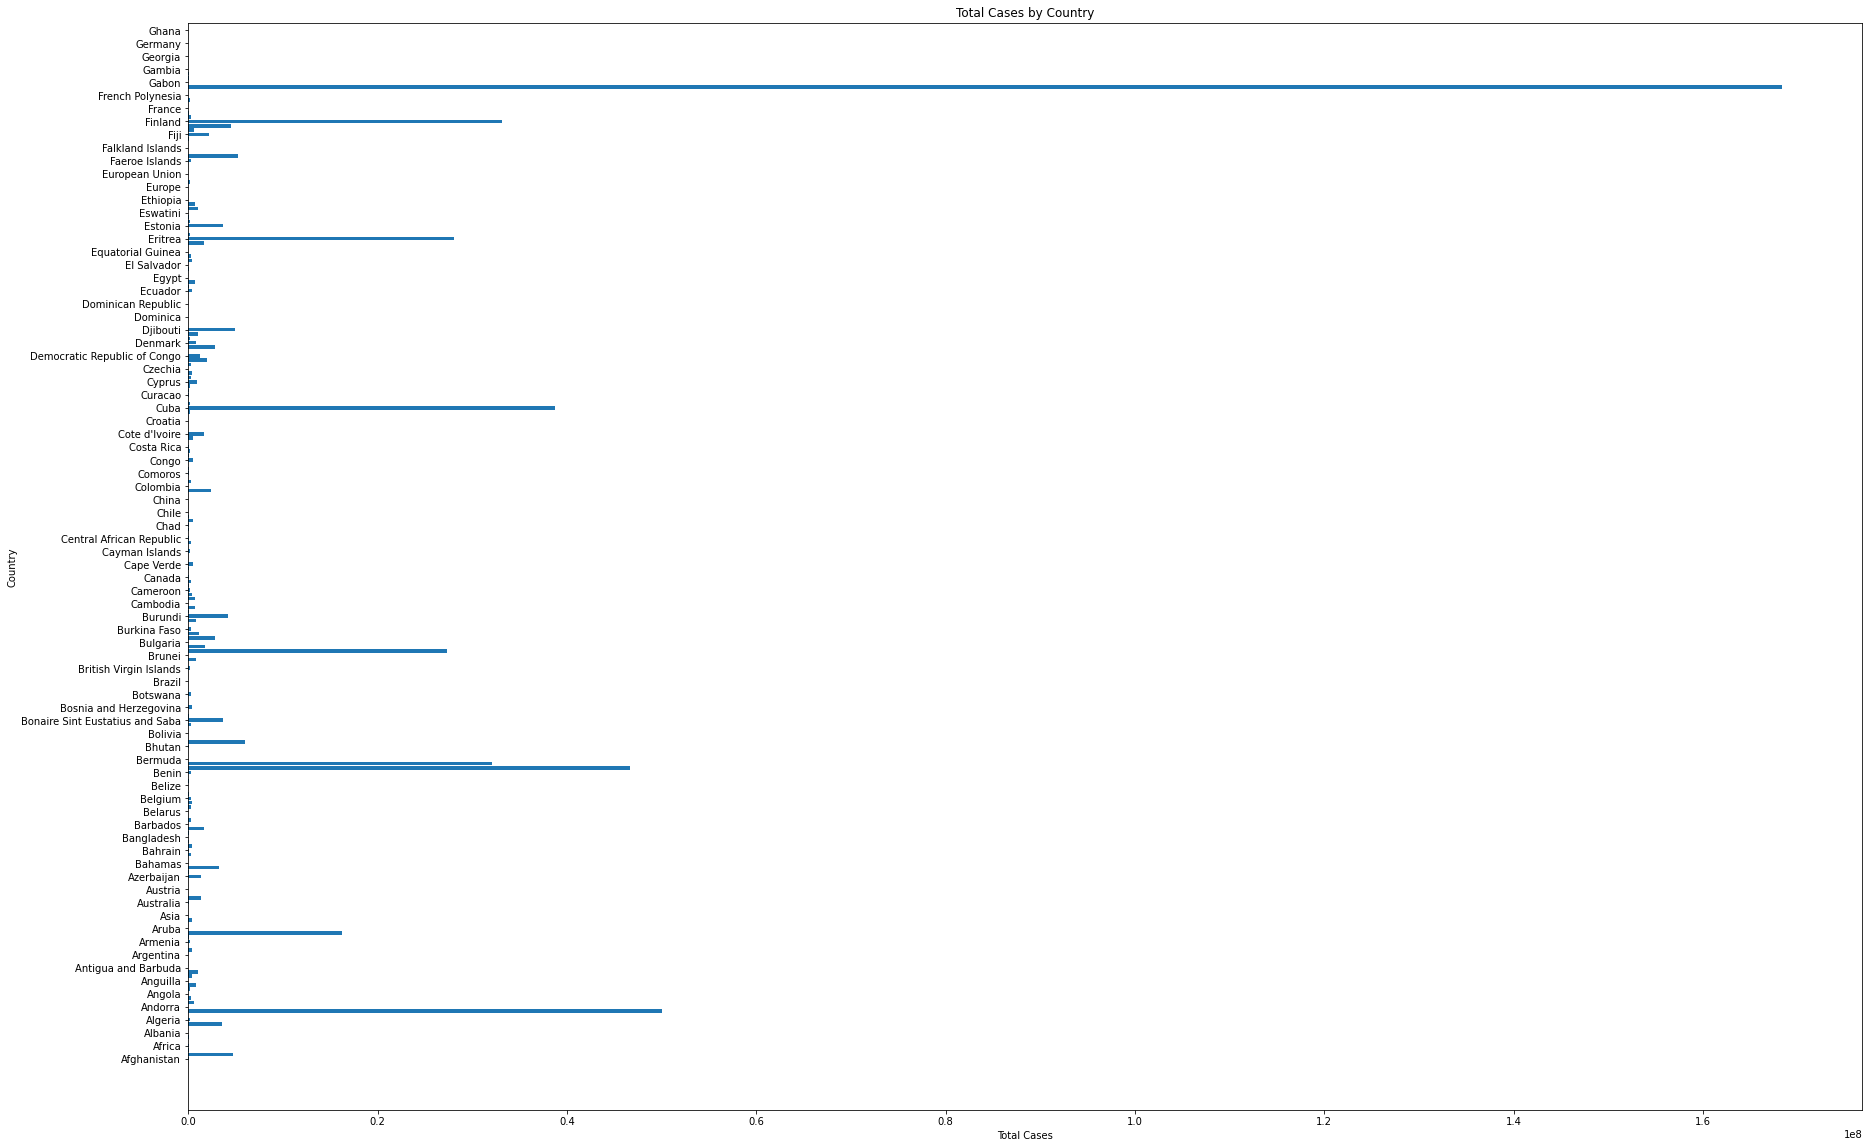

In [17]:
data = df_covid19['total_cases']
labels = df_covid19['location']
plt.figure(figsize=(30,20))
spaced_y = [3*i for i in range(len(data))]
plt.yticks(spaced_y, labels)
plt.ylabel('Country')
plt.xlabel('Total Cases')
plt.title('Total Cases by Country')
plt.barh(range(len(data)), data) 
plt.show()

### <font color=Blue>We sort the dataframe by 'total_cases' and display a meaningful subset of results:</font>

<font color=green>Reference:</font> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

In [18]:
df_sorted_result = df_covid19.sort_values(by='total_cases',ascending=False)

In [19]:
df_sorted_result.head()

location  iso_code      continent        date  total_cases  \
224          World  OWID_WRL            NaN  2021-05-26  168412812.0   
11            Asia  OWID_ASI            NaN  2021-05-26   50065902.0   
67          Europe  OWID_EUR            NaN  2021-05-26   46630003.0   
150  North America  OWID_NAM            NaN  2021-05-26   38761444.0   
216  United States       USA  North America  2021-05-26   33190470.0   

     new_cases  new_cases_smoothed  total_deaths  new_deaths  \
224   905992.0          826374.286     3498443.0     17906.0   
11    525129.0          497521.143      662491.0      6206.0   
67    346447.0          287095.143     1068396.0      7554.0   
150   327335.0          278986.429      873366.0      7003.0   
216   300310.0          251056.857      591950.0      4475.0   

     new_deaths_smoothed  ...  gdp_per_capita  extreme_poverty  \
224            14436.286  ...       15469.207             10.0   
11              5699.571  ...             NaN              NaN   
67              5608.286  ...             NaN              NaN   
150             4964.286  ...             NaN              NaN   
216             3432.571  ...       54225.446              1.2   

     cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
224                233.070                 8.51           6.434        34.635   
11                     NaN                  NaN             NaN           NaN   
67                     NaN                  NaN             NaN           NaN   
150                    NaN                  NaN             NaN           NaN   
216                151.089                10.79          19.100        24.600   

     handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
224                   60.13                       2.705            72.58   
11                      NaN                         NaN              NaN   
67                      NaN                         NaN              NaN   
150                     NaN                         NaN              NaN   
216                     NaN                       2.770            78.86   

     human_development_index  
224                    0.737  
11                       NaN  
67                       NaN  
150                      NaN  
216                    0.926  

[5 rows x 58 columns]

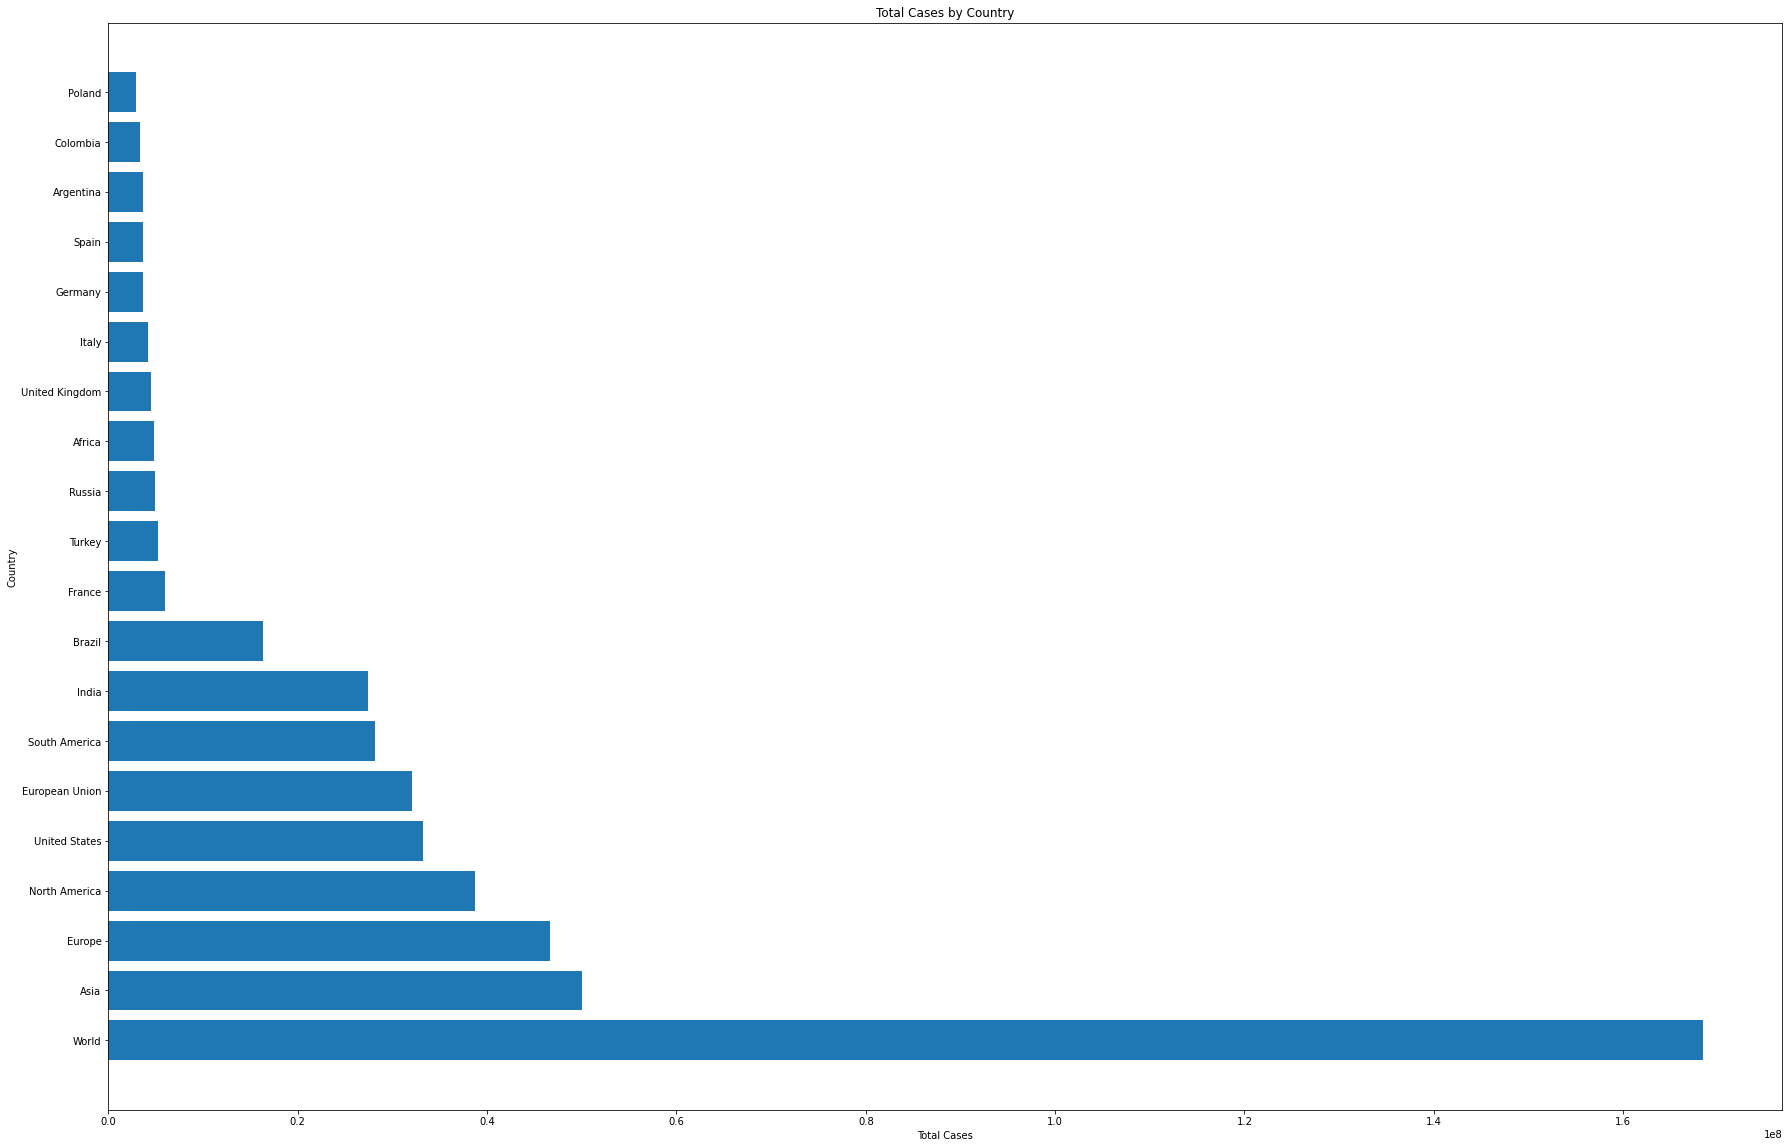

In [20]:
data = df_sorted_result.head(20)['total_cases']
labels = df_sorted_result.head(20)['location']
plt.figure(figsize=(30,20))
plt.yticks(range(len(data)), labels)
plt.ylabel('Country')
plt.xlabel('Total Cases')
plt.title('Total Cases by Country')
plt.barh(range(len(data)), data) 
plt.show()

#### Obtain the most recent entry for a specific country:

In [21]:
df_covid19[df_covid19['location']=='United States']

location iso_code      continent        date  total_cases  \
216  United States      USA  North America  2021-05-26   33190470.0   

     new_cases  new_cases_smoothed  total_deaths  new_deaths  \
216   300310.0          251056.857      591950.0      4475.0   

     new_deaths_smoothed  ...  gdp_per_capita  extreme_poverty  \
216             3432.571  ...       54225.446              1.2   

     cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
216                151.089                10.79            19.1          24.6   

     handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
216                     NaN                        2.77            78.86   

     human_development_index  
216                    0.926  

[1 rows x 58 columns]

#### A sanity check on the sort

In [22]:
df_sorted_result[df_sorted_result['location']=='United States']

location iso_code      continent        date  total_cases  \
216  United States      USA  North America  2021-05-26   33190470.0   

     new_cases  new_cases_smoothed  total_deaths  new_deaths  \
216   300310.0          251056.857      591950.0      4475.0   

     new_deaths_smoothed  ...  gdp_per_capita  extreme_poverty  \
216             3432.571  ...       54225.446              1.2   

     cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
216                151.089                10.79            19.1          24.6   

     handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
216                     NaN                        2.77            78.86   

     human_development_index  
216                    0.926  

[1 rows x 58 columns]

### Look for correlations in the data

<font color=green>Reference:</font> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [23]:
df_covid19.corr()

total_cases  new_cases  \
total_cases                               1.000000   0.949759   
new_cases                                 0.949759   1.000000   
new_cases_smoothed                        0.950264   0.996541   
total_deaths                              0.989956   0.913684   
new_deaths                                0.929270   0.923010   
new_deaths_smoothed                       0.975180   0.972010   
total_cases_per_million                   0.058320   0.090578   
new_cases_per_million                    -0.038511  -0.029373   
new_cases_smoothed_per_million           -0.019138   0.002923   
total_deaths_per_million                  0.094835   0.129767   
new_deaths_per_million                   -0.049280  -0.042190   
new_deaths_smoothed_per_million          -0.014277   0.008428   
reproduction_rate                         0.228182   0.283877   
icu_patients                              0.992855   0.975214   
icu_patients_per_million                  0.108386   0.157621   
hosp_patients                             0.959223   0.959042   
hosp_patients_per_million                -0.052488  -0.030932   
weekly_icu_admissions                     0.907443   0.841974   
weekly_icu_admissions_per_million         0.129929   0.009045   
weekly_hosp_admissions                    0.910969   0.892766   
weekly_hosp_admissions_per_million       -0.026499  -0.031984   
new_tests                                 0.695338   0.694342   
total_tests                               0.878523   0.874014   
total_tests_per_thousand                 -0.009250  -0.009253   
new_tests_per_thousand                   -0.020591  -0.016798   
new_tests_smoothed                        0.847974   0.887263   
new_tests_smoothed_per_thousand          -0.031082  -0.022032   
positive_rate                             0.001407   0.009501   
tests_per_case                           -0.079000  -0.082570   
total_vaccinations                        0.933819   0.903134   
people_vaccinated                         0.995107   0.958410   
people_fully_vaccinated                   0.981373   0.930404   
new_vaccinations                          0.873003   0.845015   
new_vaccinations_smoothed                 0.847760   0.833329   
total_vaccinations_per_hundred            0.066701   0.099610   
people_vaccinated_per_hundred             0.043764   0.078302   
people_fully_vaccinated_per_hundred       0.026235   0.048312   
new_vaccinations_smoothed_per_million    -0.007802  -0.004062   
stringency_index                          0.045880   0.070625   
population                                0.904160   0.871923   
population_density                       -0.020194  -0.024880   
median_age                                0.046076   0.087911   
aged_65_older                             0.041595   0.087708   
aged_70_older                             0.037391   0.084085   
gdp_per_capita                            0.022273   0.051652   
extreme_poverty                          -0.046387  -0.066100   
cardiovasc_death_rate                    -0.050553  -0.084737   
diabetes_prevalence                       0.021978   0.025168   
female_smokers                           -0.002708   0.031263   
male_smokers                             -0.013359  -0.036827   
handwashing_facilities                    0.044009   0.059533   
hospital_beds_per_thousand               -0.008955  -0.009405   
life_expectancy                           0.029689   0.063757   
human_development_index                   0.049512   0.088289   

                                       new_cases_smoothed  total_deaths  \
total_cases                                      0.950264      0.989956   
new_cases                                        0.996541      0.913684   
new_cases_smoothed                               1.000000      0.909449   
total_deaths                                     0.909449      1.000000   
new_deaths                                       0.910659      0.935991   
new_deaths_sm

### Create a correlation heatmap

<font color=green>Reference</font> https://seaborn.pydata.org/examples/many_pairwise_correlations.html

<AxesSubplot:>

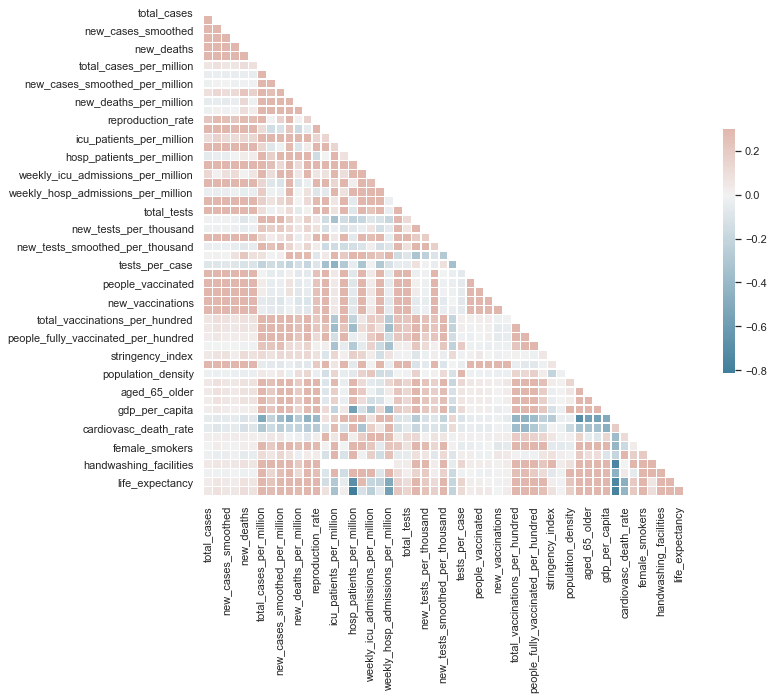

In [25]:
# Import seaborn
import seaborn as sns

# Apply the 'white' theme
sns.set(style="white")

# Compute the correlation matrix
corr = df_covid19.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Grouping data...

### Load greenhouse gas data from CSV file

In [26]:
body_ghg="../data/Greenhouse Gas Emissions worldwide.csv"

In [27]:
df_greenhouse_ = pd.read_csv(body_ghg)

In [28]:
df_greenhouse_

Country or Area  Year  co2_gigagrams  hfc_gigagrams  \
0                   Australia  2012   3.978306e+05    7945.106379   
1                   Australia  2011   3.981614e+05    7512.150105   
2                   Australia  2010   3.993648e+05    6942.606891   
3                   Australia  2009   3.986688e+05    6353.309697   
4                   Australia  2008   3.990842e+05    5810.538264   
..                        ...   ...            ...            ...   
984  United States of America  1994   5.354404e+06            NaN   
985  United States of America  1993   5.267711e+06            NaN   
986  United States of America  1992   5.156781e+06            NaN   
987  United States of America  1991   5.050478e+06            NaN   
988  United States of America  1990   5.100606e+06            NaN   

     methane_gigagrams  pfc_gigagrams  sf6_gigagrams  n2o_gigagrams  
0          111709.4988     253.697462     134.111252    25775.42951  
1          110274.7423     259.250564     134.136620    25201.09362  
2          109062.6389     243.764011     145.185945    24451.85748  
3          110806.5324     307.886656     143.230925    24897.90320  
4          113592.7600     381.135610     158.400094    25546.77744  
..                 ...            ...            ...            ...  
984        637199.5526            NaN            NaN            NaN  
985        629469.5802            NaN            NaN            NaN  
986        637785.8627            NaN            NaN            NaN  
987        635457.4711            NaN            NaN            NaN  
988        633201.8015            NaN            NaN            NaN  

[989 rows x 8 columns]

### Group data by country and select the max value in each group

<font color=green>Reference:</font> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [29]:
df_greenhouse=df_greenhouse_.groupby(['Country or Area']).max()

In [30]:
df_greenhouse

Year  co2_gigagrams  hfc_gigagrams  \
Country or Area                                                
Australia                 2012   3.993648e+05    7945.106379   
Austria                   2012   7.939294e+04    1431.451585   
Belarus                   2012   1.038068e+05      35.798720   
Belgium                   2012   1.289664e+05    2140.194020   
Bulgaria                  2012   8.023165e+04     456.407745   
Canada                    2012   5.946590e+05    7782.902339   
Croatia                   2012   2.501834e+04     485.619120   
Cyprus                    2012   8.474103e+03     260.439180   
Czech Republic            2012   1.646942e+05    2082.748727   
Denmark                   2012   7.547074e+04     871.635964   
Estonia                   2012   3.670083e+04     167.359645   
European Union            2012   4.437028e+06   85898.389850   
Finland                   2012   7.236565e+04    1169.573600   
France                    2012   4.265645e+05   16967.744550   
Germany                   2012   1.042066e+06    9345.589459   
Greece                    2012   1.138486e+05    5365.791283   
Hungary                   2012   7.247521e+04    1144.831142   
Iceland                   2012   3.605128e+03     144.116298   
Ireland                   2012   4.762685e+04     992.276693   
Italy                     2012   4.893670e+05    9246.260023   
Japan                     2012   1.296155e+06   22925.684680   
Latvia                    2012   1.905231e+04      98.557568   
Liechtenstein             2012   2.349809e+02       8.328212   
Lithuania                 2012   3.789056e+04     240.662698   
Luxembourg                2012   1.247196e+04      67.262222   
Malta                     2012   2.806662e+03     171.109063   
Monaco                    2012   1.162889e+02       6.987987   
Netherlands               2012   1.813508e+05    9331.485100   
New Zealand               2012   3.647335e+04    1817.357764   
Norway                    2012   4.553727e+04     972.335875   
Poland                    2012   3.748120e+05    7700.220238   
Portugal                  2012   6.923649e+04    1667.323895   
Romania                   2012   1.781344e+05    1033.333671   
Russian Federation        2012   2.505380e+06   28409.780950   
Slovakia                  2012   6.180549e+04     452.031940   
Slovenia                  2012   1.800301e+04     218.634236   
Spain                     2012   3.654784e+05    8448.151668   
Sweden                    2012   6.273034e+04     869.912453   
Switzerland               2012   4.636858e+04    1245.040428   
Turkey                    2012   3.574982e+05    5308.290000   
Ukraine                   2012   7.188943e+05     726.202165   
United Kingdom            2012   5.983233e+05   18958.314860   
United States of America  2012   6.116441e+06            NaN   

                          methane_gigagrams  pfc_gigagrams  sf6_gigagrams  \
Country or Area                                                             
Australia                     117417.037200    3953.323881     316.893017   
Austria                         8332.119843    1030.484331    1233.686363   
Belarus                        15476.302800            NaN       2.419971   
Belgium                         9659.084875    2335.237300    2242.589768   
Bulgaria                       16554.783250       0.050532      14.873311   
Canada                         98609.314820    6949.976395    3873.672363   
Croatia                         3715.345018     936.564272      13.678842   
Cyprus                          1303.681967            NaN       0.087392   
Czech Republic                 17888.887000      36.658430     150.905748   
Denmark                         6154.907189      22.167718     122.202248   
Estonia                         1680.978902       0.074893       3.493939   
European Union                601172.634500   21249.989990   15813.544920   
Finland                         6169.662934      27.969400     114.

## Explore Some Data Sources: 

## Our World in Data

https://ourworldindata.org/

Source of the greenhouse gas emissions data use above:

https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions


## US Census Data

https://www2.census.gov/

## Propublic Data

https://www.propublica.org/datastore/